# Ejercicios de NumPy

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Pregunta 1

Crea los siguientes arreglos con los tipos correctos. 

Un arreglo de  5×5  cuya diagonal sean  [2.0,3.0,4.0,5.0] 
Un arreglo de  4×4  cuyo último renglón sea  [1,2,3,4]  y el resto sean  0 .

In [28]:
arr1 = np.zeros((5,5))
for i in range (1,6):
    arr1[i-1,i-1] = i
    
arr1

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [31]:
arr2 = np.arange(16).reshape(4,4)
arr2[0] = np.array([0,0,0,0])
arr2[1] = np.array([0,0,0,0])
arr2[2] = np.array([0,0,0,0])
arr2[3] = (np.arange(4) + 1)
arr2

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 2, 3, 4]])

## Pregunta 2

En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

(a) Crea un arreglo de booleanos de shape (100,), con todos sus elementos True. El índice representa el número.

In [86]:
bool_arr = np.ones((100,), dtype=bool)

(b) "Tacha" los elementos 0 y 1.

In [51]:
bool_arr[0] = False 

In [52]:
bool_arr[1] = False 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el slicing.

In [85]:
N_max = int(np.sqrt(len(bool_arr)))
for j in range(2, N_max):
    bool_arr[2*j::j] = False
    

N_max es igual al piso de la raíz del máximo número. 
el for lo que hace es mover la j de 2 a N_max esto porque si un número divide a otro que es menor al máximo número, a la fuerza uno de sus divisores es menor a la raíz del máximo número (N_max, si pq = n*n entonces si p < q sabemos que p < n).
Lo que hace bool_arr[2*j::j] es que agarra un subarreglo (que comparte memoria con bool_arr) que empieza con la posición 2*j (que corresponde al número 2*j ya que inicia en 0) y va tomando luejo las posiciones siguientes con diferencia j  hasta acabar el arreglo. Esto es acaba agarrando todas las posiciones que son múltiplo de j menores al máximo número y sin contar a j y cada uno se vuelve False. Esto para hacer referencia a que como es múltiplo de j no es primo. 

In [54]:
bool_arr

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

 Mira la documentacion de np.nonzero para imprimir todos los números primos.

In [55]:
np.nonzero?

In [56]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

Encapsula lo que acabamos de hacer en una función llamada criba_eratostenes, que reciba como argumento maximo el cual representa el tamaño del array. Muestra el resultado para maximo = {10, 100, 200}, usando un for.

In [11]:
def criba_eratostenes(x):
    bool_arr = np.ones((x,), dtype=bool)
    bool_arr[0] = False 
    bool_arr[1] = False 
    N_max = int(np.sqrt(len(bool_arr)))
    for j in range(2, N_max + 1):
        bool_arr[2*j::j] = False
    
    return np.nonzero(bool_arr)

In [12]:
ej = {10, 100, 200}

for e in ej:
   print("Primos menores o iguales que ", e)
   print(criba_eratostenes(e))
        

Primos menores o iguales que  200
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)
Primos menores o iguales que  10
(array([2, 3, 5, 7]),)
Primos menores o iguales que  100
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)


## Pregunta 3

Crea un cubo rubik, partiendo de un arreglo de ceros y usando slicing dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del  1 ). Muestra con indexing que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en  0 ?

In [101]:
cubo = np.zeros((6,3,3))

In [100]:
for i in range (6):
    cubo[i] = i + 1
cubo

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]])

## Pregunta 4

El **Sudoku** es un pasatiempo que consiste en un arreglo  $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.

(a) Crea una función llamada `correcto` que reciba un `array` $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9.

In [132]:
def correcto(x):
    bool_arr = np.zeros((9,), dtype=bool)
    for i in range (9):
        if x[i] <= 10 and x[i] >= 1:
            if bool_arr[x[i]-1] == False:
                bool_arr[x[i]-1] = True
            else:
                return False
        else:
            return False
    return True

False

(b) Crea una función llamada `descomponer3x3` que reciba un `array` de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

In [193]:
def descomponer3x3(x):
    c1 = x[:3,:3]
    c2 = x[:3,3:6]
    c3 = x[:3,6:]
    c4 = x[3:6,:3]
    c5 = x[3:6,3:6]
    c6 = x[3:6,6:]
    c7 = x[6:,:3]
    c8 = x[6:,3:6]
    c9 = x[6:,6:]
    return c1,c2,c3,c4,c5,c6,c7,c8,c9

(c) Crea la función `esSolucion` que recibe un `array` de $9\times 9$ y devuelve si es o no solución del sudoku.

In [161]:
def esSolucion(x):
    for i in range(9):
        if correcto(x[i]) == False:
            return False
        if correcto(x[:,i]) == False:
            return False
        c1,c2,c3,c4,c5,c6,c7,c8,c9 = descomponer3x3(x)
        if correcto(c1.reshape(9)) == False:
            return False
        if correcto(c1.reshape(9)) == False:
            return False
        if correcto(c2.reshape(9)) == False:
            return False
        if correcto(c3.reshape(9)) == False:
            return False
        if correcto(c4.reshape(9)) == False:
            return False
        if correcto(c5.reshape(9)) == False:
            return False
        if correcto(c6.reshape(9)) == False:
            return False
        if correcto(c7.reshape(9)) == False:
            return False
        if correcto(c8.reshape(9)) == False:
            return False
        if correcto(c9.reshape(9)) == False:
            return False
    return True

In [162]:
sud = np.arange(1,82).reshape(9,9)
sud[0,0] = 5
sud[0,1] = 3
sud[0,2] = 4
sud[0,3] = 6
sud[0,4] = 7
sud[0,5] = 8
sud[0,6] = 9
sud[0,7] = 1
sud[0,8] = 2
sud[1,0] = 6
sud[1,1] = 7
sud[1,2] = 2
sud[1,3] = 1
sud[1,4] = 9
sud[1,5] = 5
sud[1,6] = 3
sud[1,7] = 4
sud[1,8] = 8
sud[2,0] = 1
sud[2,1] = 9
sud[2,2] = 8
sud[2,3] = 3
sud[2,4] = 4
sud[2,5] = 2
sud[2,6] = 5
sud[2,7] = 6
sud[2,8] = 7
sud[3,0] = 8
sud[3,1] = 5
sud[3,2] = 9
sud[3,3] = 7
sud[3,4] = 6
sud[3,5] = 1
sud[3,6] = 4
sud[3,7] = 2
sud[3,8] = 3
sud[4,0] = 4
sud[4,1] = 2
sud[4,2] = 6
sud[4,3] = 8
sud[4,4] = 5
sud[4,5] = 3
sud[4,6] = 7
sud[4,7] = 9
sud[4,8] = 1
sud[5,0] = 7
sud[5,1] = 1
sud[5,2] = 3
sud[5,3] = 9
sud[5,4] = 2
sud[5,5] = 4
sud[5,6] = 8
sud[5,7] = 5
sud[5,8] = 6
sud[6,0] = 9
sud[6,1] = 6
sud[6,2] = 1
sud[6,3] = 5
sud[6,4] = 3
sud[6,5] = 7
sud[6,6] = 2
sud[6,7] = 8
sud[6,8] = 4
sud[7,0] = 2
sud[7,1] = 8
sud[7,2] = 7
sud[7,3] = 4
sud[7,4] = 1
sud[7,5] = 9
sud[7,6] = 6
sud[7,7] = 3
sud[7,8] = 5
sud[8,0] = 3
sud[8,1] = 4
sud[8,2] = 5
sud[8,3] = 2
sud[8,4] = 8
sud[8,5] = 6
sud[8,6] = 1
sud[8,7] = 7
sud[8,8] = 9

In [192]:
sud

array([[5, 3, 4, 6, 7, 8, 9, 1, 2],
       [6, 7, 2, 1, 9, 5, 3, 4, 8],
       [1, 9, 8, 3, 4, 2, 5, 6, 7],
       [8, 5, 9, 7, 6, 1, 4, 2, 3],
       [4, 2, 6, 8, 5, 3, 7, 9, 1],
       [7, 1, 3, 9, 2, 4, 8, 5, 6],
       [9, 6, 1, 5, 3, 7, 2, 8, 4],
       [2, 8, 7, 4, 1, 9, 6, 3, 5],
       [3, 4, 5, 2, 8, 6, 1, 7, 9]])

In [164]:
esSolucion(sud)

True

## Pregunta 5

Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
lec = np.loadtxt('sunspots.txt')
X = np.zeros(len(lec))
Y = np.zeros(len(lec))
i = 0
for l in lec:
    X[i] = lec[i,0]
    Y[i] = lec[i,1]
    i = i + 1

X = (X / 12) + 1749 #pone a X en términos del año correspondiente
lec

array([[0.000e+00, 5.800e+01],
       [1.000e+00, 6.260e+01],
       [2.000e+00, 7.000e+01],
       ...,
       [3.140e+03, 2.520e+01],
       [3.141e+03, 2.350e+01],
       [3.142e+03, 2.160e+01]])

Dame un número entre 0 y 10 7


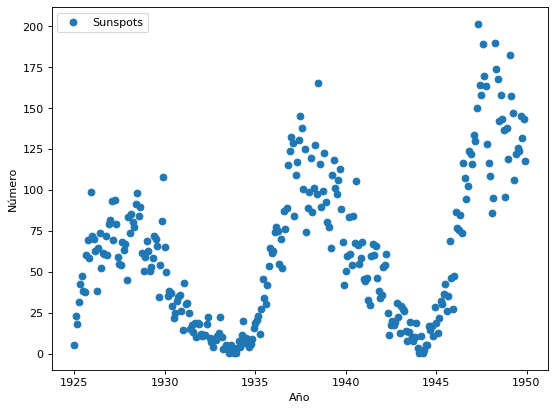

In [150]:
def ejeXyY(i):
    return X[i:i+300] , Y[i:i + 300]

i = int(input("Dame un número entre 0 y 10 "))
xI, yI = ejeXyY(12 + 300*i)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xI,yI, label="Sunspots")
plt.xlabel('Año')
plt.ylabel('Número')
plt.legend(loc='best')

(b) Calcula el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average). Dibújalo sobre el dibujo original.

Dame un número entre 0 y 10 5


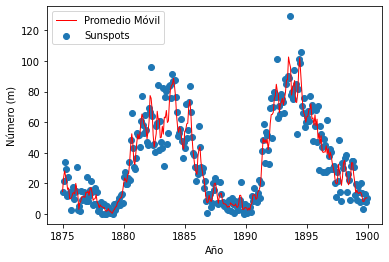

In [146]:
def ejeXyY(i):
    return X[i:i+300] , Y[i:i + 300]

i = int(input("Dame un número entre 0 y 10 "))
xI, yI = ejeXyY(12 + 300*i)

promMo = np.array(yI)
for j in range (1,len(promMo)-1):
    promMo[j] = (yI[j-1] + yI[j] + yI[j + 1])/3 #hace el promedio de su posición, una antes y uno después. Las esquenas no permaneces igual

    
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(xI,promMo, color="red", linewidth=1.0, linestyle="-", label="Promedio Móvil")
plt.scatter(xI,yI, label = "Sunspots")
plt.xlabel('Año')
plt.ylabel('Número')
plt.legend(loc='best')

## Pregunta 6

Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

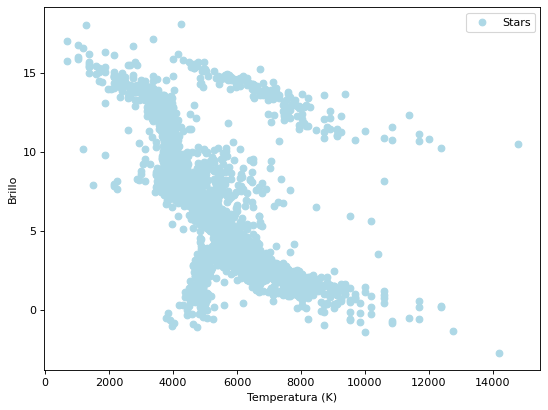

In [166]:
lec = np.loadtxt('stars.txt')
Xs = np.zeros(len(lec))
Ys = np.zeros(len(lec))
i = 0

for l in lec:
    Xs[i] = lec[i,0]
    Ys[i] = lec[i,1]
    i = i + 1 
    
plt.figure(figsize=(8, 6), dpi=80)


plt.scatter(Xs,Ys,  color = "lightblue", label="Stars")
plt.xlabel('Temperatura (K)')
plt.ylabel('Brillo')
plt.legend(loc='best')

(b) Ahora usa el `xlim()` y  `ylim()` para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de [wikipedia]( http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) y agrega anotaciones para explicarlas.
